In [21]:
from PIL import Image
import matplotlib.pyplot as plt
import cv2 
import numpy as np
import pandas as pd
import torch
import re
import os

In [13]:
userData = pd.read_csv('Bill.com/Users.csv')

In [14]:
userData[userData.documentid == "00d0223498663"]

,documentid,paymentid,amount,date,vendor_name,vendor_address
494,00d0223498663,00p0611347643,29.3,2016-12-25,GOLDEN ARCHES RESTAURANTS SDN BHD,"LEVEL 6, BANGUNAN TH, DAMANSARA UPTOWN3 NO.3, ..."


In [15]:
OCR = pd.read_csv('Bill.com/ocr/00d0223498663.csv', names=["x1","y1","x2","y2","x3","y3","x4","y4","TEXT"])

In [16]:
for r in range(len(OCR)):
    print(OCR.iloc[r].TEXT)

YOUR ORDER NUMBER IS
264
GOLDEN ARCHES RESTAURANTS SDN BHD
(65351-M)
LEVEL 6
NO.3
SELANGOR
(GST ID NO: 000504664064)
MCDONALD'S KOTA DAMANSARA DT(#178)
TEL NO. 03-6156-2180
TAX INVOICE
MFY SIDE 1
INV# 001780200112117
ORD #64 -REG #2- 25/12/2016 13:51:47
THANK YOU AND PLEASE COME AGAIN.
QTY ITEM
TOTAL
2 L FILETOFISH
21.18
2 L COKE
NO ICE
2 L FRIES
1 6NUGGETS
7.10
1 BARBECUE SAUCE
1 SAMLL CONE
1.00
EAT-IN TOTAL (INCL GST)
29.28
ROUNDING ADJUST
0.02
TOTAL ROUNDED
29.30
CASH TENDERED
50.00
CHANGE
20.70
TOTAL INCLUDES 6% GST
1.66
CUSTOMER SERVICE HOTLINE : 03-2726-5600


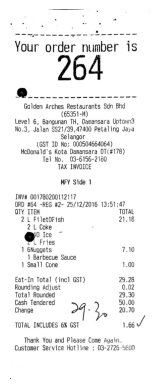

In [17]:
image = Image.open("Bill.com/img/00d0223498663.jpg")
image = np.array(image)
plt.imshow(image); plt.axis(False)

In [18]:
OCR_STRING = OCR.to_string()
OCR_STRING

"     x1    y1   x2    y2   x3    y3   x4    y4                                     TEXT\n0    24   165  661   165  661   225   24   225                     YOUR ORDER NUMBER IS\n1   248   240  484   240  484   376  248   376                                      264\n2    72   492  601   492  601   524   72   524        GOLDEN ARCHES RESTAURANTS SDN BHD\n3   266   532  403   532  403   566  266   566                                (65351-M)\n4    24   571  648   571  648   604   24   604                                  LEVEL 6\n5    25   612  645   612  645   645   25   645                                     NO.3\n6   264   652  390   652  390   684  264   684                                 SELANGOR\n7   140   690  534   690  534   726  140   726                (GST ID NO: 000504664064)\n8    55   731  595   731  595   761   55   761       MCDONALD'S KOTA DAMANSARA DT(#178)\n9   170   769  503   769  503   799  170   799                     TEL NO. 03-6156-2180\n10  245   809  424  

In [19]:
# test_file = open("test.txt", 'r')
# text = test_file.read()
# dates = re.findall('(\d+/\d+/\d+)', text)
# OCR_STRING = OCR.applymap(str)
OCR_STRING = OCR.to_string()
date_re = "\d{2}[/-]\d{2}[/-]\d+"
dates = re.findall(date_re, OCR_STRING)

In [20]:
dates

['25/12/2016']

In [103]:
print(type((OCR.TEXT)))

<class 'pandas.core.series.Series'>


In [29]:
dir = 'Bill.com/ocr/'
for name in os.listdir(dir):
    if name.endswith(".csv"):
        # print(name)
        OCR_CSV = pd.read_csv(dir + '/' + name, names=["x1","y1","x2","y2","x3","y3","x4","y4","TEXT"], engine='python', on_bad_lines='skip')
        # print(OCR_CSV)
        
        OCR_CSV_STRING = OCR_CSV.to_string()
        date_re = "\d{2}[/-]\d{2}[/-]\d+"
        dates = re.findall(date_re, OCR_CSV_STRING)
        
        if dates:
            print(name, dates, "True")
        else:
            print(name, dates, "False")    
        

00d0100894168.csv ['11/05/2018'] True
00d0102367243.csv ['18-06-2018'] True
00d0103738916.csv ['12-02-2018'] True
00d0106074517.csv ['30-04-18'] True
00d0106280922.csv ['15/01/2018'] True
00d0108922007.csv ['25/12/2018'] True
00d0114026522.csv ['13/01/2018'] True
00d0114666542.csv ['01-06-2018'] True
00d0115214912.csv ['10/05/2017'] True
00d0116292534.csv ['07/07/17'] True
00d0116788763.csv ['11-04-18'] True
00d0118393124.csv ['27/02/2018'] True
00d0121860229.csv ['03-05-18'] True
00d0121880972.csv ['13/03/2018'] True
00d0123031653.csv ['10/02/2017', '10/02/2017'] True
00d0124895452.csv ['20/03/2018'] True
00d0128862298.csv ['05-05-18'] True
00d0130065999.csv ['18-04-06', '06/04/18'] True
00d0139330423.csv ['28-05-2018', '28-05-2018'] True
00d0139642641.csv [] False
00d0142736377.csv ['13-06-2018', '13-06-2018'] True
00d0145054354.csv ['11/12/2017'] True
00d0145695018.csv ['03/08/2017', '03/08/2017'] True
00d0147095939.csv ['13/10/2017'] True
00d0147748424.csv [] False
00d0150882989.cs